In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading the data

In [2]:
column_names = ['User_ID', 'MovieID', 'Rating', 'Timestamp']
ratings = pd.read_csv("ratings.dat", sep = "::", names = column_names, engine='python')
ratings = ratings.drop('Timestamp', axis = 1)
ratings.head()

,User_ID,MovieID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [3]:
column_names = ['MovieID', 'Title', 'Genres']
movies = pd.read_csv("movies.dat", sep = "::", names = column_names, encoding='latin-1', engine='python')
movies.head() 

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
column_names = ['User_ID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users = pd.read_csv("users.dat", sep = "::", names = column_names, engine='python')
users

,User_ID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [1598]:
max_movieID = int(movies['MovieID'].max())
max_userID = int(ratings['User_ID'].max())
print (max_movieID, max_userID)

3952 6040


In [1599]:
# movie_genres will store genre of movie_id in movie_genres[movie_id]
movie_genres = []
for i in range (max_movieID + 1):
  movie_genres.append ([])

for index, row in movies.iterrows():
  genres_str = row['Genres']
  genres_list = genres_str.split('|')
  movie_genres[row['MovieID']] = (genres_list)
print(movie_genres)

[[], ['Animation', "Children's", 'Comedy'], ['Adventure', "Children's", 'Fantasy'], ['Comedy', 'Romance'], ['Comedy', 'Drama'], ['Comedy'], ['Action', 'Crime', 'Thriller'], ['Comedy', 'Romance'], ['Adventure', "Children's"], ['Action'], ['Action', 'Adventure', 'Thriller'], ['Comedy', 'Drama', 'Romance'], ['Comedy', 'Horror'], ['Animation', "Children's"], ['Drama'], ['Action', 'Adventure', 'Romance'], ['Drama', 'Thriller'], ['Drama', 'Romance'], ['Thriller'], ['Comedy'], ['Action'], ['Action', 'Comedy', 'Drama'], ['Crime', 'Drama', 'Thriller'], ['Thriller'], ['Drama', 'Sci-Fi'], ['Drama', 'Romance'], ['Drama'], ['Drama'], ['Romance'], ['Adventure', 'Sci-Fi'], ['Drama'], ['Drama'], ['Drama', 'Sci-Fi'], ['Adventure', 'Romance'], ["Children's", 'Comedy', 'Drama'], ['Drama', 'Romance'], ['Drama'], ['Documentary'], ['Comedy'], ['Comedy', 'Romance'], ['Drama'], ['Drama', 'War'], ['Action', 'Crime', 'Drama'], ['Drama'], ['Action', 'Adventure'], ['Comedy', 'Drama'], ['Drama', 'Romance'], ['Crim

In [1600]:
columns = ["Action","Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]

In [1601]:
# user_ratings[user_id] is a list of tupes with each tuple of the form (movieid, rating) 
user_ratings = []
for i in range (max_userID + 1):
  user_ratings.append ([])

for index, row in ratings.iterrows():
  userid = int(row["User_ID"])
  movieid = int(row["MovieID"])
  rating = int(row["Rating"])
  user_ratings[userid].append ((movieid, rating)) 

In [1602]:
genre_index = {column: index for index, column in enumerate(columns)}
print(genre_index)

{'Action': 0, 'Adventure': 1, 'Animation': 2, "Children's": 3, 'Comedy': 4, 'Crime': 5, 'Documentary': 6, 'Drama': 7, 'Fantasy': 8, 'Film-Noir': 9, 'Horror': 10, 'Musical': 11, 'Mystery': 12, 'Romance': 13, 'Sci-Fi': 14, 'Thriller': 15, 'War': 16, 'Western': 17}


In [1603]:
# code to make the user_genre_matrix
user_genre_ratings_df = pd.DataFrame(columns=['User_ID']+columns)
for userid in range (1, max_userID + 1):
  sum_ratings = np.zeros (len(columns))
  cnt_ratings = np.zeros (len(columns))

  for index, pair in enumerate (user_ratings[userid]):
    movieid = pair[0]
    rating = pair[1]

    for genre in movie_genres[movieid]:
      if genre not in genre_index:
        continue
      
      sum_ratings[genre_index[genre]] = np.add (sum_ratings[genre_index[genre]], rating)
      cnt_ratings[genre_index[genre]] = np.add (cnt_ratings[genre_index[genre]], 1)

  cur_genre_ratings = [userid]
  for i in range (len(columns)):
    if (cnt_ratings[i] > 0):
      cur_genre_ratings.append (np.divide (sum_ratings[i], cnt_ratings[i]))
    else:
      cur_genre_ratings.append (np.nan)

  
  user_genre_ratings_df.loc[len(user_genre_ratings_df)] = cur_genre_ratings

  

In [1604]:
user_genre_ratings_df

,User_ID,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,NaN,4.428571,4.00,NaN,NaN,4.285714,NaN,3.666667,4.333333,3.666667,5.000000,NaN
1,2.0,3.500000,3.736842,NaN,NaN,3.560000,3.583333,NaN,3.898734,3.00,4.000000,3.000000,NaN,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
2,3.0,3.956522,4.000000,4.000000,4.000000,3.766667,NaN,NaN,4.000000,4.50,NaN,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667
3,4.0,4.157895,3.833333,NaN,4.000000,NaN,5.000000,NaN,4.166667,4.50,NaN,4.333333,NaN,NaN,4.000000,3.555556,3.500000,3.333333,4.500000
4,5.0,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,NaN,4.000000,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,6036.0,3.000000,2.987952,3.911765,3.444444,3.203065,3.528302,3.909091,3.505376,3.00,4.058824,2.986486,3.709677,3.411765,3.352459,2.834320,3.142857,3.785714,3.642857
6036,6037.0,3.642857,4.000000,4.000000,3.666667,3.576271,3.833333,4.000000,3.877551,4.25,3.444444,4.111111,4.000000,3.692308,3.681818,3.692308,3.705882,4.000000,3.750000
6037,6038.0,3.000000,4.000000,3.666667,3.000000,3.833333,NaN,NaN,3.888889,NaN,NaN,2.500000,NaN,NaN,4.166667,4.000000,NaN,4.000000,NaN
6038,6039.0,4.000000,4.100000,3.615385,3.529412,3.723077,4.000000,NaN,4.000000,3.60,4.500000,4.000000,3.690476,4.176471,3.800000,4.250000,4.142857,4.111111,4.500000


In [1605]:
null_percentages_per_column = (user_genre_ratings_df.isnull().mean(axis=0) * 100).round(2)

# Display null percentages for each column
print(null_percentages_per_column)

User_ID         0.00
Action          0.46
Adventure       2.42
Animation      20.40
Children's     12.53
Comedy          0.15
Crime           6.26
Documentary    62.86
Drama           0.05
Fantasy        19.70
Film-Noir      31.29
Horror         12.25
Musical        21.29
Mystery        15.02
Romance         1.31
Sci-Fi          2.14
Thriller        0.84
War             4.49
Western        32.12
dtype: float64


In [1606]:
# Calculate the average of each column
column_means = user_genre_ratings_df.mean()
# Fill null values with the average of the column
user_genre_ratings_df.fillna(column_means, inplace=True)

In [1607]:
null_percentages_per_row = (user_genre_ratings_df.isnull().mean(axis=1) * 100).round(2)

# Display null percentages for each row
print(null_percentages_per_row[null_percentages_per_row > 0])

Series([], dtype: float64)


In [1608]:
user_genre_ratings_df.head()

,User_ID,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,3.849741,4.428571,4.000000,4.012229,3.329958,4.285714,3.740407,3.666667,4.333333,3.666667,5.000000,3.626491
1,2.0,3.500000,3.736842,3.695687,3.527253,3.560000,3.583333,3.849741,3.898734,3.000000,4.000000,3.000000,3.682838,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
2,3.0,3.956522,4.000000,4.000000,4.000000,3.766667,3.769441,3.849741,4.000000,4.500000,4.012229,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667
3,4.0,4.157895,3.833333,3.695687,4.000000,3.638193,5.000000,3.849741,4.166667,4.500000,4.012229,4.333333,3.682838,3.740407,4.000000,3.555556,3.500000,3.333333,4.500000
4,5.0,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,3.579154,4.000000,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000


In [1609]:
class k_means:
  def __init__ (self, k, iterations):
    self.k = k
    self.iterations = iterations

    self.clusters = []
    for _ in range (self.k):
      self.clusters.append ([])
      
    self.centroids = []
    self.loss = 0.0 
  
  
  def get_labels (self, data):
    self.data = data
    self.cnt_samples, self.cnt_features = data.shape 
    
    self.centroids = self.kmeansplusplus ()
    centroids = np.zeros((self.k, self.cnt_features)) # row , column full with zero 
    for K in range (self.k): # iterations of 
      random_var = np.random.choice(range(self.cnt_samples))
      centroid = data[random_var] # random centroids
      centroids[K] = centroid
    self.centroids = centroids

    self.optimise ()

    # getting labels
    labels = np.empty (self.cnt_samples)
    for cluster_index, cluster in enumerate (self.clusters): 
      for point in cluster:
        labels[point] = cluster_index

    self.inertia (self.data, labels)

    return labels

  # https://stackoverflow.com/questions/5466323/how-could-one-implement-the-k-means-algorithm
  def kmeansplusplus (self):
    random_state = 1000
    np.random.seed (random_state)
    centroids = [self.data[0]]

    for _ in range (1, self.k):
        D2 = np.array ([min([np.inner(c-x,c-x) for c in centroids]) for x in self.data])
        probs = D2 / D2.sum ()
        cumprobs = probs.cumsum ()
        r = np.random.rand ()
        
        for j, p in enumerate(cumprobs):
            if r < p:
                i = j
                break
        
        centroids.append (self.data[i])

    return np.array (centroids)
  
  def optimise (self):
    for _ in range (self.iterations):
      self.clusters = self.clusterize () # new clusters according to old centroids
      current_centroids = self.centroids 
      self.centroids = self.update_centroids ()

      sum = 0
      for i in range (len (self.centroids)):
        sum += self.distance (current_centroids[i], self.centroids[i])

      if (sum == 0): # converged
        break      

     
  def clusterize (self):
    clusters = []
    for _ in range (self.k):
      clusters.append ([])

    for index, point in enumerate (self.data):
      closest = self.closest_centroid (point) #closest centroid
      clusters[closest].append (index)

    return clusters

  def closest_centroid (self, point):
    min_distance = self.distance (point, self.centroids[0])
    closest = 0
    for i in range (1, len (self.centroids)):
      current_dist = self.distance (point, self.centroids[i])
      if (current_dist < min_distance):
        min_distance = current_dist
        closest = i

    return closest

  def update_centroids (self):
    centroids = np.zeros ((self.k, self.cnt_features))
    
    for cluster_idx, cluster in enumerate(self.clusters):
        if len(cluster) > 0:
            cluster_mean = np.mean(self.data[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
    
    return centroids


  def distance (self, point1, point2) : # eucledian distance
    return np.sqrt (np.sum ((point1 - point2) ** 2))


  def inertia (self, datapoints,labels):
    for index, points in enumerate (datapoints):
      #print (index, labels[index])
      self.loss += (self.distance (self.centroids[int(labels[index])], points)) ** 2
  
  def predict(self, point):
    return self.closest_centroid (point)

In [1610]:
# Logic: Compute V and Sigma using power iteration method and then compute U using X*V=U*Sigma
import numpy as np
from random import normalvariate
from math import sqrt
 
def random_unit_vector(size):
    unnormalized = [normalvariate(0, 1) for _ in range(size)]
    norm = sqrt(sum(v * v for v in unnormalized))
    return [v / norm for v in unnormalized]
 
def power_iterate(X, epsilon=1e-10):    
    # Recursively compute X^T X dot v to compute weights vector/eignevector
 
    n, m = X.shape
    start_v = random_unit_vector(m) # Taking a random unit vector v initially
    prev_eigenvector = None
    curr_eigenvector = start_v
    covariance_matrix = np.dot(X.T, X)
 
    # power iterationn until converges
    it = 0        
    while True:
        it += 1
        prev_eigenvector = curr_eigenvector
        curr_eigenvector = np.dot(covariance_matrix, prev_eigenvector)
        norm = sqrt(sum(v * v for v in curr_eigenvector))
        curr_eigenvector = curr_eigenvector / norm
 
        if abs(np.dot(curr_eigenvector, prev_eigenvector)) > 1 - epsilon:            
            return curr_eigenvector

def svd(X, epsilon=1e-10):
    n, m = X.shape
    change_of_basis = []
 
    for i in range(m):
        data_matrix = X.copy()
 
        for sigma, u, v in change_of_basis[:i]:
            data_matrix -= sigma * np.outer(u, v) 
 
        v = power_iterate(data_matrix, epsilon=epsilon) ## eigenvector 
        u_sigma = np.dot(X, v) ## 2nd step: XV = U Sigma 
        norm = sqrt(sum(x * x for x in u_sigma))
        sigma = norm  
        u = u_sigma / sigma
 
        change_of_basis.append((sigma, u, v))
     
    sigmas, us, v_transposes = [np.array(x) for x in zip(*change_of_basis)]
 
    return sigmas, us.T, v_transposes            

In [1611]:
sigma, U, V_T = svd(user_genre_ratings_df.iloc[:, 1:].to_numpy())
U_features = U[:, :(user_genre_ratings_df.shape[1] - 1)]

In [1612]:
sigma

array([1223.77884379,   63.67897472,   59.81576134,   52.3852789 ,
         50.89607461,   45.95959143,   45.0332759 ,   44.04434716,
         41.65085612,   40.36838484,   36.80833997,   34.0088556 ,
         33.5080885 ,   29.48368608,   27.61338761,   24.08458017,
         21.04382678,   20.18250307])

In [1613]:
df = U_features

In [1614]:
print(U_features)

[[ 0.01400269 -0.01144685 -0.00641271 ...  0.01453356  0.0065356
  -0.00822341]
 [ 0.01257393 -0.00088213  0.00283591 ...  0.00113809 -0.00828365
  -0.00765756]
 [ 0.01341463 -0.01470408 -0.0074871  ...  0.0008645   0.00084984
  -0.002304  ]
 ...
 [ 0.01274353  0.00143345  0.00166711 ...  0.00465376 -0.03414086
   0.01144814]
 [ 0.0137882   0.0106901  -0.00841196 ... -0.00353658 -0.00625763
  -0.00030016]
 [ 0.01263512  0.00390164  0.01626447 ... -0.01280541 -0.01127649
   0.00256584]]


In [1615]:
# distortions = []
# ran = range(1,50,1)
# for K in ran:
#     kmeanModel = k_means(k=K,iterations=150)
#     kmeanModel.get_labels(np.array(df))
#     distortions.append(kmeanModel.loss)

In [1616]:
# plt.figure(figsize=(12, 6))
# plt.plot(ran,distortions)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.xticks(np.arange(min(ran), max(ran)+1, 1.0))
# plt.show()

In [1617]:
cluster_size = 16

In [1618]:
kmeans = k_means(cluster_size, 1000)
labels = kmeans.get_labels (U_features)
print (labels, min(labels), max(labels))

[12. 14. 15. ...  5. 14. 14.] 0.0 15.0


In [1619]:
clusters = [[] for _ in range (cluster_size)] # for each cluster, which userids are present in it

for i in range (0, labels.shape[0]) :
  clusters[int(labels[i])].append (i + 1)

# print (clusters)

## Adding test user

In [1620]:
#assumption that user ids are same as index for ease of implementation later on
row, col = users.shape
new_id = row + 1
new_user = {'User_ID':new_id, 'Gender':'M', 'Age': 21, 'Occupation': 15, 'Zip-code': 45555}
users.loc[len(users)] = new_user
users

,User_ID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


In [1621]:
users["User_ID"].max()

6041

In [1622]:
ratings

,User_ID,MovieID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
1000204,6040,1091,1
1000205,6040,1094,5
1000206,6040,562,5
1000207,6040,1096,4


In [1623]:
ratings["User_ID"].max()

6040

In [1624]:
# #Good movies good
# new_data = [{'User_ID':new_id, 'MovieID': 6, 'Rating': 5}, {'User_ID':new_id, 'MovieID':593, 'Rating':4}, {'User_ID':new_id, 'MovieID':1, 'Rating':5}, {'User_ID':new_id, 'MovieID':47, 'Rating':4}, {'User_ID':new_id, 'MovieID':586, 'Rating':5}, {'User_ID':new_id, 'MovieID':589, 'Rating':4}, {'User_ID':new_id, 'MovieID':165, 'Rating':5}, {'User_ID':new_id, 'MovieID':2571, 'Rating':4}, {'User_ID':new_id, 'MovieID':3668, 'Rating':5}, {'User_ID':new_id, 'MovieID':1203, 'Rating':4}, {'User_ID':new_id, 'MovieID':858, 'Rating':5}, {'User_ID':new_id, 'MovieID':527, 'Rating':4},{'User_ID':new_id, 'MovieID':920, 'Rating':5}, {'User_ID':new_id, 'MovieID':1350, 'Rating':4}, {'User_ID':new_id, 'MovieID':1210, 'Rating':5}]

# for data in new_data:
#     ratings.loc[len(ratings)] = data
#     print(ratings.loc[len(ratings) - 1])

In [1625]:
# #Good movies good and bad movies bad
# new_data = [{'User_ID':new_id, 'MovieID': 6, 'Rating': 5}, {'User_ID':new_id, 'MovieID':593, 'Rating':4}, {'User_ID':new_id, 'MovieID':1, 'Rating':5}, {'User_ID':new_id, 'MovieID':47, 'Rating':4}, {'User_ID':new_id, 'MovieID':586, 'Rating':5}, {'User_ID':new_id, 'MovieID':589, 'Rating':4}, {'User_ID':new_id, 'MovieID':165, 'Rating':5}, {'User_ID':new_id, 'MovieID':2571, 'Rating':4}, {'User_ID':new_id, 'MovieID':3668, 'Rating':5}, {'User_ID':new_id, 'MovieID':1203, 'Rating':4}, {'User_ID':new_id, 'MovieID':858, 'Rating':5}, {'User_ID':new_id, 'MovieID':527, 'Rating':4},{'User_ID':new_id, 'MovieID':920, 'Rating':5}, {'User_ID':new_id, 'MovieID':1350, 'Rating':4}, {'User_ID':new_id, 'MovieID':1210, 'Rating':5},{'User_ID':new_id, 'MovieID': 172, 'Rating': 1}, {'User_ID':new_id, 'MovieID':1389, 'Rating':2}, {'User_ID':new_id, 'MovieID':1562, 'Rating':1}, {'User_ID':new_id, 'MovieID':2145, 'Rating':2}, {'User_ID':new_id, 'MovieID':1888, 'Rating':3}, {'User_ID':new_id, 'MovieID':2724, 'Rating':1}, {'User_ID':new_id, 'MovieID':3287, 'Rating':2}, {'User_ID':new_id, 'MovieID':3315, 'Rating':1}, {'User_ID':new_id, 'MovieID':3718, 'Rating':2}, {'User_ID':new_id, 'MovieID':56, 'Rating':1}, {'User_ID':new_id, 'MovieID':320, 'Rating':2}, {'User_ID':new_id, 'MovieID':427, 'Rating':1}, {'User_ID':new_id, 'MovieID':512, 'Rating':1}, {'User_ID':new_id, 'MovieID':516, 'Rating':2}, {'User_ID':new_id, 'MovieID':967, 'Rating':1}]

# for data in new_data:
#     ratings.loc[len(ratings)] = data
#     print(ratings.loc[len(ratings) - 1])

In [1626]:
# # Good movies bad and bad movies good
# new_data = [{'User_ID':new_id, 'MovieID': 6, 'Rating': 1}, {'User_ID':new_id, 'MovieID':593, 'Rating':2}, {'User_ID':new_id, 'MovieID':1, 'Rating':1}, {'User_ID':new_id, 'MovieID':47, 'Rating':2}, {'User_ID':new_id, 'MovieID':586, 'Rating':1}, {'User_ID':new_id, 'MovieID':589, 'Rating':2}, {'User_ID':new_id, 'MovieID':165, 'Rating':1}, {'User_ID':new_id, 'MovieID':2571, 'Rating':2}, {'User_ID':new_id, 'MovieID':3668, 'Rating':1}, {'User_ID':new_id, 'MovieID':1203, 'Rating':2}, {'User_ID':new_id, 'MovieID':858, 'Rating':1}, {'User_ID':new_id, 'MovieID':527, 'Rating':2},{'User_ID':new_id, 'MovieID':920, 'Rating':1}, {'User_ID':new_id, 'MovieID':1350, 'Rating':2}, {'User_ID':new_id, 'MovieID':1210, 'Rating':1}, {'User_ID':new_id, 'MovieID': 172, 'Rating': 5}, {'User_ID':new_id, 'MovieID':1389, 'Rating':4}, {'User_ID':new_id, 'MovieID':1562, 'Rating':5}, {'User_ID':new_id, 'MovieID':2145, 'Rating':4}, {'User_ID':new_id, 'MovieID':1888, 'Rating':5}, {'User_ID':new_id, 'MovieID':2724, 'Rating':4}, {'User_ID':new_id, 'MovieID':3287, 'Rating':5}, {'User_ID':new_id, 'MovieID':3315, 'Rating':4}, {'User_ID':new_id, 'MovieID':3718, 'Rating':5}, {'User_ID':new_id, 'MovieID':56, 'Rating':4}, {'User_ID':new_id, 'MovieID':320, 'Rating':5}, {'User_ID':new_id, 'MovieID':427, 'Rating':4}, {'User_ID':new_id, 'MovieID':512, 'Rating':5}, {'User_ID':new_id, 'MovieID':516, 'Rating':4}, {'User_ID':new_id, 'MovieID':967, 'Rating':5}]

# for data in new_data:
#     ratings.loc[len(ratings)] = data
#     print(ratings.loc[len(ratings) - 1])

In [1627]:
# # shlok
# new_data = [{'User_ID':new_id, 'MovieID': 47, 'Rating': 5}, {'User_ID':new_id, 'MovieID':111, 'Rating':4}, {'User_ID':new_id, 'MovieID':123, 'Rating':5}, {'User_ID':new_id, 'MovieID':215, 'Rating':5}, {'User_ID':new_id, 'MovieID':260, 'Rating':3}, {'User_ID':new_id, 'MovieID':296, 'Rating':5}, {'User_ID':new_id, 'MovieID':318, 'Rating':5}, {'User_ID':new_id, 'MovieID':541, 'Rating':5}, {'User_ID':new_id, 'MovieID':924, 'Rating':5}, {'User_ID':new_id, 'MovieID':1221, 'Rating':5}, {'User_ID':new_id, 'MovieID':1237, 'Rating':4}]

# for data in new_data:
#     ratings.loc[len(ratings)] = data
#     #print(len(ratings))
#     print(ratings.loc[len(ratings) - 1])

In [1628]:
# # #Bad movies bad
# new_data = [{'User_ID':new_id, 'MovieID': 172, 'Rating': 1}, {'User_ID':new_id, 'MovieID':1389, 'Rating':2}, {'User_ID':new_id, 'MovieID':1562, 'Rating':1}, {'User_ID':new_id, 'MovieID':2145, 'Rating':2}, {'User_ID':new_id, 'MovieID':1888, 'Rating':3}, {'User_ID':new_id, 'MovieID':2724, 'Rating':1}, {'User_ID':new_id, 'MovieID':3287, 'Rating':2}, {'User_ID':new_id, 'MovieID':3315, 'Rating':1}, {'User_ID':new_id, 'MovieID':3718, 'Rating':2}, {'User_ID':new_id, 'MovieID':56, 'Rating':1}, {'User_ID':new_id, 'MovieID':320, 'Rating':2}, {'User_ID':new_id, 'MovieID':427, 'Rating':1}, {'User_ID':new_id, 'MovieID':512, 'Rating':1}, {'User_ID':new_id, 'MovieID':516, 'Rating':2}, {'User_ID':new_id, 'MovieID':967, 'Rating':1}]

# for data in new_data:
#     ratings.loc[len(ratings)] = data
#     #print(len(ratings))
#     print(ratings.loc[len(ratings) - 1])

In [1629]:
# Bad movies good
new_data = [{'User_ID':new_id, 'MovieID': 172, 'Rating': 5}, {'User_ID':new_id, 'MovieID':1389, 'Rating':4}, {'User_ID':new_id, 'MovieID':1562, 'Rating':5}, {'User_ID':new_id, 'MovieID':2145, 'Rating':4}, {'User_ID':new_id, 'MovieID':1888, 'Rating':5}, {'User_ID':new_id, 'MovieID':2724, 'Rating':4}, {'User_ID':new_id, 'MovieID':3287, 'Rating':5}, {'User_ID':new_id, 'MovieID':3315, 'Rating':4}, {'User_ID':new_id, 'MovieID':3718, 'Rating':5}, {'User_ID':new_id, 'MovieID':56, 'Rating':4}, {'User_ID':new_id, 'MovieID':320, 'Rating':5}, {'User_ID':new_id, 'MovieID':427, 'Rating':4}, {'User_ID':new_id, 'MovieID':512, 'Rating':5}, {'User_ID':new_id, 'MovieID':516, 'Rating':4}, {'User_ID':new_id, 'MovieID':967, 'Rating':5}]

for data in new_data:
    ratings.loc[len(ratings)] = data
    #print(len(ratings))
    print(ratings.loc[len(ratings) - 1])

User_ID    6041
MovieID     172
Rating        5
Name: 1000209, dtype: int64
User_ID    6041
MovieID    1389
Rating        4
Name: 1000210, dtype: int64
User_ID    6041
MovieID    1562
Rating        5
Name: 1000211, dtype: int64
User_ID    6041
MovieID    2145
Rating        4
Name: 1000212, dtype: int64
User_ID    6041
MovieID    1888
Rating        5
Name: 1000213, dtype: int64
User_ID    6041
MovieID    2724
Rating        4
Name: 1000214, dtype: int64
User_ID    6041
MovieID    3287
Rating        5
Name: 1000215, dtype: int64
User_ID    6041
MovieID    3315
Rating        4
Name: 1000216, dtype: int64
User_ID    6041
MovieID    3718
Rating        5
Name: 1000217, dtype: int64
User_ID    6041
MovieID      56
Rating        4
Name: 1000218, dtype: int64
User_ID    6041
MovieID     320
Rating        5
Name: 1000219, dtype: int64
User_ID    6041
MovieID     427
Rating        4
Name: 1000220, dtype: int64
User_ID    6041
MovieID     512
Rating        5
Name: 1000221, dtype: int64
User_ID    6

In [1630]:
ratings["User_ID"].max()

6041

In [1631]:
# Code to create new_user-genre ratings list
sum_ratings = np.zeros (len(columns))
cnt_ratings = np.zeros (len(columns))
for dict in new_data:
  movieid = dict['MovieID']
  rating = dict['Rating']

  for genre in movie_genres[movieid]:
    if genre not in genre_index:
      continue
    
    sum_ratings[genre_index[genre]] = np.add (sum_ratings[genre_index[genre]], rating)
    cnt_ratings[genre_index[genre]] = np.add (cnt_ratings[genre_index[genre]], 1)

new_genre_ratings = []
for i in range (len(columns)):
  if (cnt_ratings[i] > 0):
    new_genre_ratings.append (np.divide (sum_ratings[i], cnt_ratings[i]))
  else:
    new_genre_ratings.append (np.nan)


In [1632]:
Vtt = V_T.T

In [1633]:
new_genre_ratings

[4.666666666666667,
 4.5,
 5.0,
 4.5,
 4.25,
 5.0,
 5.0,
 4.333333333333333,
 4.0,
 5.0,
 4.5,
 4.0,
 4.0,
 4.25,
 5.0,
 4.666666666666667,
 4.0,
 5.0]

In [1634]:
for i in range (len (new_genre_ratings)):
  if np.isnan (new_genre_ratings[i]):
    new_genre_ratings[i] = column_means[columns[i]]
    

In [1635]:
new_genre_ratings

[4.666666666666667,
 4.5,
 5.0,
 4.5,
 4.25,
 5.0,
 5.0,
 4.333333333333333,
 4.0,
 5.0,
 4.5,
 4.0,
 4.0,
 4.25,
 5.0,
 4.666666666666667,
 4.0,
 5.0]

In [1636]:
sigma

array([1223.77884379,   63.67897472,   59.81576134,   52.3852789 ,
         50.89607461,   45.95959143,   45.0332759 ,   44.04434716,
         41.65085612,   40.36838484,   36.80833997,   34.0088556 ,
         33.5080885 ,   29.48368608,   27.61338761,   24.08458017,
         21.04382678,   20.18250307])

In [1637]:
# Code to get new user representation of the new user in the U matrix 
svded_row = []
for i in range (1, U_features.shape[1] + 1):
  val = np.dot (new_genre_ratings, Vtt[:, i-1])
  if (sigma[i-1] == 0):
    svded_row.append(0)
  else:
    svded_row.append (np.divide (val, sigma[i-1]))

In [1638]:
svded_row

[0.01571818620050609,
 0.0005229835547999644,
 -0.003736445894090128,
 -0.0010604837085774143,
 0.014438178384022926,
 -0.0017558343473584295,
 -0.021174432736867206,
 0.008894325402774657,
 0.005286519521538822,
 -0.009921496563553974,
 0.02839418174416051,
 -0.00686060609073706,
 0.005337114228100036,
 -0.00547755094024406,
 0.0050734107667023106,
 -0.013155058602082237,
 0.00028402801283865616,
 0.0029299720404113625]

In [1639]:
# svded_row.append(new_data.len())

In [1640]:
np.array(svded_row, dtype=np.float64).reshape(1, 18)

array([[ 0.01571819,  0.00052298, -0.00373645, -0.00106048,  0.01443818,
        -0.00175583, -0.02117443,  0.00889433,  0.00528652, -0.0099215 ,
         0.02839418, -0.00686061,  0.00533711, -0.00547755,  0.00507341,
        -0.01315506,  0.00028403,  0.00292997]])

In [1641]:
cluster_id = kmeans.predict (np.array(svded_row, dtype=float).reshape(1, 18))
cluster_id

15

In [1642]:
print(kmeans.centroids[cluster_id])

[ 0.01332153 -0.00591847 -0.00501056 -0.00053102  0.00452502  0.00237445
 -0.00124697 -0.00213174  0.00020685 -0.00779257  0.00215679 -0.00678356
  0.0043146  -0.00081897 -0.00187748  0.00028397  0.00189979 -0.00068113]


In [1643]:
cluster_id = int(cluster_id)
print (cluster_id)

15


In [1644]:
movies[['Genre 1', 'Genre 2', 'Genre 3', 'Genre 4', 'Genre 5', 'Genre 6']] = movies.Genres.str.split("|",expand=True)
movies.head()

,MovieID,Title,Genres,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation,Children's,Comedy,None,None,None
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,Children's,Fantasy,None,None,None
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,None,None,None,None
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy,Drama,None,None,None,None
4,5,Father of the Bride Part II (1995),Comedy,Comedy,None,None,None,None,None


In [1645]:
movieset = pd.merge(movies, ratings, on = 'MovieID')
movieset.sort_values("User_ID", ascending = False, inplace = True)
movieset

,MovieID,Title,Genres,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,User_ID,Rating
25619,56,Kids of the Round Table (1995),Adventure|Children's|Fantasy,Adventure,Children's,Fantasy,None,None,None,6041,4
738621,2724,Runaway Bride (1999),Comedy|Romance,Comedy,Romance,None,None,None,None,6041,4
592189,2145,Pretty in Pink (1986),Comedy|Drama|Romance,Comedy,Drama,Romance,None,None,None,6041,4
139736,516,Renaissance Man (1994),Comedy|Drama|War,Comedy,Drama,War,None,None,None,6041,4
875491,3287,"Tigger Movie, The (2000)",Animation|Children's,Animation,Children's,None,None,None,None,6041,5
...,...,...,...,...,...,...,...,...,...,...,...
341058,1246,Dead Poets Society (1989),Drama,Drama,None,None,None,None,None,1,4
756393,2797,Big (1988),Comedy|Fantasy,Comedy,Fantasy,None,None,None,None,1,4
439740,1566,Hercules (1997),Adventure|Animation|Children's|Comedy|Musical,Adventure,Animation,Children's,Comedy,Musical,None,1,4
67449,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi,None,None,1,4


# Preprocessing

In [1646]:
movie_ratings = pd.DataFrame(movieset.groupby('Title')['Rating'].mean())
movie_ratings['Number of Ratings'] = movieset.groupby('Title')['Rating'].count()
movie_ratings.sort_values(by=['Number of Ratings'])

,Rating,Number of Ratings
Title,,
Another Man's Poison (1952),4.000000,1
Night Tide (1961),2.000000,1
Shadows (Cienie) (1988),1.000000,1
"McCullochs, The (1975)",1.000000,1
Anna (1996),4.000000,1
...,...,...
Jurassic Park (1993),3.763847,2672
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990


### Function to define our movie-user interaction matrix we use in the below methods

In [1647]:
def interactionmatrix(dataset, User_ID, Title, Rating):
    movie_user_interact = dataset.pivot_table(index = User_ID, columns = Title, values = Rating).fillna(0)
    return movie_user_interact

In [1648]:
movie_user = interactionmatrix(movieset, 'User_ID', 'MovieID', 'Rating')
movie_user

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# User-User based collaborative filtering - Pearson's Correlation

1. Find pairs of users:
    * Group users by those that have watched atleast one movie the target user has watched.   
    
2. Compute Similarity:
    * Calculate the Pearson correlation coefficient between each pair of users based on their ratings.
    * Return the similarity index for each valid user-user pair

2. Find closest users:
    * Select top 50 users that are closest to target user.
    * These neighbors are users whose ratings are most similar to the target user.

3. Predict Ratings:
    For each movie not yet rated by the target user:
    * Predict the rating by taking a weighted average of ratings from similar users.
    * Weight each neighbor's rating by their correlation coefficient with the target user.
    * Normalize the ratings by subtracting the user's mean rating to handle biases.
    
4. Recommendation:
    * Recommend the top-rated movies to the target user based on the predicted ratings.
    * Sort the predicted ratings and recommend the movies with the highest scores.

### Defining our version of inverse document frequency - Assigning unique weights to movies based on a skewed gaussian

In [1649]:
watchFreq = movieset.groupby('MovieID')['Rating'].agg(['count', 'mean']).rename(columns={'count': 'Freq', 'mean': 'AvgMovieRating'})
watchFreq.sort_values('Freq', inplace=True, ascending = False)
watchFreq.head()

,Freq,AvgMovieRating
MovieID,,
2858,3428,4.317386
260,2991,4.453694
1196,2990,4.292977
1210,2883,4.022893
480,2672,3.763847


In [1650]:
watchFreq['Freq'].median()

123.5

0.9830375239538252


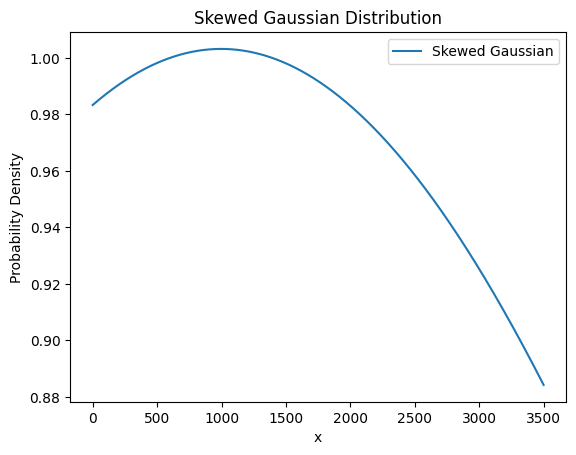

In [1651]:
def skewed_gaussian_value(x, mean = 600, std_dev = 5000, skewness = 0.1):
    t = (x - mean) / std_dev
    # return 1
    return np.exp(-0.5 * t**2) * (1 + math.erf(skewness * t / np.sqrt(2)))

print(skewed_gaussian_value(2000))

# Generate x values
x_values = np.linspace(0, 3500, 3000)

# Calculate corresponding y values for skewed Gaussian
y_values = np.vectorize(lambda x: skewed_gaussian_value(x))(x_values)

# Plot the skewed Gaussian distribution
plt.plot(x_values, y_values, label='Skewed Gaussian')
plt.title('Skewed Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [1652]:
watchFreq['weight'] = watchFreq["Freq"].apply(skewed_gaussian_value)
watchFreq.sort_values('weight', inplace=True, ascending = False)
watchFreq.head()

,Freq,AvgMovieRating,weight
MovieID,,,
1909,996,3.492972,1.003168
551,996,3.717871,1.003168
1266,997,4.090271,1.003168
3897,994,4.226358,1.003168
1233,1001,4.302697,1.003168


In [1653]:
avg_ratings = pd.DataFrame(movieset.groupby('User_ID')['Rating'].mean())
avg_ratings.rename(columns = {'Rating':'AvgRating'}, inplace = True) 
avg_ratings.sort_values('User_ID', inplace=True)
avg_ratings.head()

,AvgRating
User_ID,
1,4.188679
2,3.713178
3,3.901961
4,4.190476
5,3.146465


In [1654]:
avg_ratings.tail()

,AvgRating
User_ID,
6037,3.717822
6038,3.800000
6039,3.878049
6040,3.577713
6041,4.533333


In [1655]:
avg_ratings.loc[6041, 'AvgRating']

4.533333333333333

## Define our implementation of Pearsons Correlation

In [1656]:
def get_pearson_corr(userSubsetGroup, inputMovie):
    global watchFreq
    #Sorting it so users with movie most in common with the input will have priority
    userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)
    
    #Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
    pearsonCorDict = {}

    #For every user group in our subset
    for name, group in userSubsetGroup:
        #sorting the input and current user group so the values aren't mixed up later on
        group = group.sort_values(by='MovieID')
        inputMovie = inputMovie.sort_values(by='MovieID')
        watchFreq = watchFreq.sort_index()
        
        #Get the N for the formula
        n = len(group)
        
        #Get the review scores for the movies that they both have in common
        temp = inputMovie[inputMovie['MovieID'].isin(group['MovieID'].tolist())]
        
        #Get the weights corresponding to the movies
        weights = watchFreq[watchFreq.index.isin(group['MovieID'].tolist())]
        weightList = weights['weight'].tolist()
        
        #And then store them in a temporary buffer variable in a list format to facilitate future calculations
        tempRatingList = temp['Rating'].tolist()
        
        #put the current user group reviews in a list format
        tempGroupList = group['Rating'].tolist()

        new_user_ratings = tempRatingList - avg_ratings.loc[6041,'AvgRating']
        group_user_ratings = tempGroupList - avg_ratings.loc[name[0],'AvgRating']

        Sxy = sum(x*y*z for x,y,z in zip(weightList, new_user_ratings ,group_user_ratings))
        new_user_ratings_square = new_user_ratings**2
        group_user_ratings_square = group_user_ratings**2

        Sxx = np.sqrt(np.dot(new_user_ratings_square, weightList))
        Syy = np.sqrt(np.dot(group_user_ratings_square, weightList))
        
        # #Now let's calculate the pearson correlation between two users, so called, x and y
        # Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(n)
        # Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(n)
        # Sxy = sum( i*j*w for i, j, w in zip(tempRatingList, tempGroupList, weightList)) - sum(tempRatingList)*sum(tempGroupList)/float(n)
        

        # #If the denominator != zero, then divide else, 0 correlation.
        # if Sxx != 0 and Syy != 0:
        #     pearsonCorDict[name] = Sxy/math.sqrt(Sxx*Syy)
        # else:
        #     pearsonCorDict[name] = 0
                             # #If the denominator != zero, then divide else, 0 correlation.
        if Sxx != 0 and Syy != 0:
            pearsonCorDict[name] = Sxy/(Sxx*Syy)
        else:
            pearsonCorDict[name] = 0
    return pearsonCorDict
    
    

## Returns the list of top users similar to a given user

In [1657]:
# testtt = None
tu = None
temp2 = None
# hello = None

In [1658]:
def find_similar_users(movie_user, target_user_id, top_k, weighted = False):
    #define profile of the user
    global tu
    global temp2
    # global hello
    target_user = []
    movie_id = 1
    
    #finding the movie ids of all movies target user has watched
    for idx, movie_rating in movie_user.iloc[target_user_id - 1].items():
        if movie_rating > 0:
            target_user.append([idx, movies.loc[movies['MovieID'] == idx,'Title'].values[0], movie_rating])
        movie_id += 1
    
    tu = target_user.copy()
    
    #convert profile to df
    inputMovie = pd.DataFrame(target_user, columns = ['MovieID', 'Title', 'Rating'])
    # hello = inputMovie

    li = clusters[cluster_id]
    
    #list of all users that have watched the same movies as target user
    similar_users = ratings[ratings['MovieID'].isin(inputMovie['MovieID'])  & ratings['User_ID'].isin(li)]
    
    #groupby creates subgroups based on param specified
    userSubsetGroup = similar_users.groupby(['User_ID'])
    temp2 = userSubsetGroup
    
    #get the map of similar users to similarity index
    pearson_corr = get_pearson_corr(userSubsetGroup, inputMovie)
    
    #construct DF for each pair of user, similarity values
    pearson = []
    for user, sim in pearson_corr.items():
        user_ = list(user)
        pearson.append([user_[0], sim])
        
    pearsonDF = pd.DataFrame(pearson, columns = ['User_ID', 'similarityIndex'])
    
    #get top 50 users based on similarity 
    topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[:30]
    
    # for index, row in topUsers.iterrows():
    #     if row['similarityIndex'] == 0:
    #         topUsers.drop(index, inplace=True)
    
    return topUsers

### Enter the target user id here

In [1659]:
#Enter the target user id you want to recommend movies to
target_user_id = 6041
top_similar_users = find_similar_users(movie_user, target_user_id, 10)
top_similar_users.head()

,User_ID,similarityIndex
234,5319,1.0
119,485,1.0
184,3386,1.0
216,4790,1.0
188,3773,1.0


In [1660]:
top_similar_users

,User_ID,similarityIndex
234,5319,1.0
119,485,1.0
184,3386,1.0
216,4790,1.0
188,3773,1.0
176,3087,1.0
191,3901,1.0
113,336,1.0
244,5716,1.0
196,4095,1.0


In [1661]:
tu

[[56, 'Kids of the Round Table (1995)', 4.0],
 [172, 'Johnny Mnemonic (1995)', 5.0],
 [320, 'Suture (1993)', 5.0],
 [427, 'Boxing Helena (1993)', 4.0],
 [512, "Robert A. Heinlein's The Puppet Masters (1994)", 5.0],
 [516, 'Renaissance Man (1994)', 4.0],
 [967, 'Outlaw, The (1943)', 5.0],
 [1389, 'Jaws 3-D (1983)', 4.0],
 [1562, 'Batman & Robin (1997)', 5.0],
 [1888, 'Hope Floats (1998)', 5.0],
 [2145, 'Pretty in Pink (1986)', 4.0],
 [2724, 'Runaway Bride (1999)', 4.0],
 [3287, 'Tigger Movie, The (2000)', 5.0],
 [3315, 'Happy Go Lovely (1951)', 4.0],
 [3718, 'American Pimp (1999)', 5.0]]

### Now that we have the most similar users given a target user, we will find the weighted average of the movies using Pearsons correlation and our novel defined weights

In [1662]:
top_similar_users['User_ID'] = top_similar_users['User_ID'].astype('int64')

In [1663]:
#to get weighted average we first need ratings of all the movies the top users have watched
topUsersRating = top_similar_users.merge(ratings, left_on='User_ID', right_on='User_ID', how='inner')
topUsersRating = topUsersRating.merge(avg_ratings, left_on='User_ID', right_on='User_ID', how='inner')
topUsersRating = topUsersRating.merge(watchFreq, left_on='MovieID', right_on='MovieID', how='inner')
topUsersRating.head()

,User_ID,similarityIndex,MovieID,Rating,AvgRating,Freq,AvgMovieRating,weight
0,5319,1.0,3793,4,3.814433,1511,3.820649,0.997836
1,3386,1.0,3793,4,3.709459,1511,3.820649,0.997836
2,3087,1.0,3793,5,3.919192,1511,3.820649,0.997836
3,2205,1.0,3793,3,3.076621,1511,3.820649,0.997836
4,5090,1.0,3793,5,4.150000,1511,3.820649,0.997836


In [1664]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*(topUsersRating['Rating'] - topUsersRating['AvgRating'])
topUsersRating['modSim'] = abs(topUsersRating['similarityIndex'])
topUsersRating.head()

,User_ID,similarityIndex,MovieID,Rating,AvgRating,Freq,AvgMovieRating,weight,weightedRating,modSim
0,5319,1.0,3793,4,3.814433,1511,3.820649,0.997836,0.185567,1.0
1,3386,1.0,3793,4,3.709459,1511,3.820649,0.997836,0.290541,1.0
2,3087,1.0,3793,5,3.919192,1511,3.820649,0.997836,1.080808,1.0
3,2205,1.0,3793,3,3.076621,1511,3.820649,0.997836,-0.076621,1.0
4,5090,1.0,3793,5,4.150000,1511,3.820649,0.997836,0.850000,1.0


### Apply the formula to calculate predicting rating and return the top K movies accordingly

In [1665]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('MovieID').sum()[['modSim','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.sort_values("sum_similarityIndex", inplace=True, ascending = True)
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
MovieID,,
1996,1.0,-2.425926
2802,1.0,-0.150000
2814,1.0,-1.425926
970,1.0,-1.324619
955,1.0,-0.150000


In [1666]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()

#Now we take the weighted average
# Modify the 'weighted average recommendation score' calculation
tempTopUsersRating['weighted average recommendation score'] = np.where(
    tempTopUsersRating['sum_similarityIndex'] == 0,
    0,  # Set to 0 if sum_similarityIndex is 0
    avg_ratings.iloc[target_user_id-1]['AvgRating'] + tempTopUsersRating['sum_weightedRating'] / tempTopUsersRating['sum_similarityIndex']
)
#tempTopUsersRating['weighted average recommendation score'] = avg_ratings.iloc[target_user_id-1]['AvgRating'] + tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
tempTopUsersRating

,sum_similarityIndex,sum_weightedRating,weighted average recommendation score
MovieID,,,
1996,1.0,-2.425926,2.107407
2802,1.0,-0.150000,4.383333
2814,1.0,-1.425926,3.107407
970,1.0,-1.324619,3.208715
955,1.0,-0.150000,4.383333
...,...,...,...
2571,19.0,18.742421,5.519777
1210,19.0,7.372670,4.921369
1265,19.0,4.718527,4.781677


## Generate final recommendations

In [1667]:
#Top k movies recommended to user
k = 10

recommendation_df = tempTopUsersRating.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(k)

,sum_similarityIndex,sum_weightedRating,weighted average recommendation score
MovieID,,,
3088,1.0,1.923379,6.456713
3676,1.0,1.864151,6.397484
1178,1.0,1.816949,6.350282
1254,1.0,1.675381,6.208715
3468,1.0,1.675381,6.208715
2917,1.0,1.675381,6.208715
3198,1.0,1.675381,6.208715
2372,1.0,1.607143,6.140476
2128,1.0,1.607143,6.140476


In [1668]:
output = movies.loc[movies['MovieID'].isin(recommendation_df.head(k).index.tolist())]
output = output.merge(recommendation_df, left_on='MovieID', right_on='MovieID', how='inner')
output.sort_values('weighted average recommendation score', inplace=True, ascending=False)
output.drop(columns = ['sum_similarityIndex', 'sum_weightedRating'], inplace = True)
output = output.merge(watchFreq, left_on='MovieID', right_on='MovieID', how='inner')
output

,MovieID,Title,Genres,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,weighted average recommendation score,Freq,AvgMovieRating,weight
0,3088,Harvey (1950),Comedy,Comedy,None,None,None,None,None,6.456713,356,4.089888,0.994921
1,3676,Eraserhead (1977),Drama|Horror,Drama,Horror,None,None,None,None,6.397484,199,3.467337,0.990411
2,1178,Paths of Glory (1957),Drama|War,Drama,War,None,None,None,None,6.350282,230,4.473913,0.991378
3,1254,"Treasure of the Sierra Madre, The (1948)",Adventure,Adventure,None,None,None,None,None,6.208715,453,4.289183,0.997223
4,2917,Body Heat (1981),Crime|Thriller,Crime,Thriller,None,None,None,None,6.208715,504,4.031746,0.998284
5,3198,Papillon (1973),Drama,Drama,None,None,None,None,None,6.208715,325,4.073846,0.994107
6,3468,"Hustler, The (1961)",Drama,Drama,None,None,None,None,None,6.208715,450,4.240000,0.997158
7,1416,Evita (1996),Drama|Musical,Drama,Musical,None,None,None,None,6.140476,282,3.255319,0.992915
8,2128,Safe Men (1998),Comedy,Comedy,None,None,None,None,None,6.140476,25,3.320000,0.984294
9,2372,Fletch Lives (1989),Comedy,Comedy,None,None,None,None,None,6.140476,238,2.966387,0.991621
